# Matplotlib tutorial Corey Schafer

Importing packages and dummy data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

from pandas import DataFrame
from openpyxl import load_workbook

def read_xlrange(path = None, sheet_name = None, range_string = None, header = True, index_col=None):
    wb = load_workbook(path, data_only = True)
    if type(sheet_name) == str:
        ws = wb[sheet_name]
    elif type(sheet_name) == int:
        ws = wb.worksheets[sheet_name]
    elif sheet_name == None:
        ws = wb.worksheets[0]
    ws_range = ws[range_string]
    list_range = [[cell.value for cell in row] for row in ws_range[header:]]
    df = DataFrame(list_range, columns = (lambda: [cell.value for cell in ws_range[0]] if header==True else None)())
    if index_col == None:
        return df
    else:
        return df.set_index(index_col)

credit_index_data = read_xlrange('C:/Users/ludann/Documents/BANCA_SELLA/Modello_LGD/Danger_Rate/REPORT_IFRS9.xlsx', range_string = "B2:I173")

credit_index_data.set_index(['ABI', 'EVENTO1', 'bucket'], inplace = True)

BS_impr = credit_index_data.loc[pd.IndexSlice['03268', 'PERFO', 'impr'], :]

c:\users\ludann\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [2]:
print(BS_impr)

                      year_ci         C  DR_lifecycle   DR_ANNO  \
ABI   EVENTO1 bucket                                              
03268 PERFO   impr       2010  0.299756      0.513608  0.336477   
              impr       2011 -0.002765      0.513608  0.497204   
              impr       2012 -0.122142      0.513608  0.560223   
              impr       2013 -0.074089      0.513608  0.559975   
              impr       2014 -0.210642      0.513608  0.647821   
              impr       2015 -0.093966      0.513608  0.502833   
              impr       2016 -0.074763      0.513608  0.479912   
              impr       2017 -0.166393      0.513608  0.471453   
              impr       2018 -0.158286      0.513608  0.462792   

                      DR_riproporzionato  
ABI   EVENTO1 bucket                      
03268 PERFO   impr              0.335436  
              impr              0.490345  
              impr              0.551835  
              impr              0.527258  
    

Plot n° 1

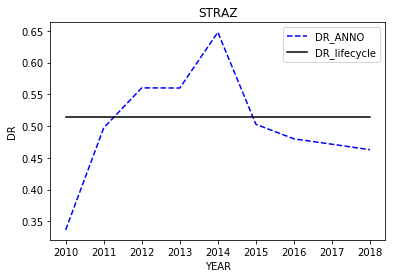

In [3]:
years = BS_impr['year_ci']
plt.plot(years, BS_impr['DR_ANNO'], 'b--', label = 'DR_anno')

plt.title('STRAZ')
plt.xlabel('YEAR')
plt.ylabel('DR')
plt.plot(years, BS_impr['DR_lifecycle'], 'k', label = 'DR_lifecycle')

# error-prone
plt.legend(['DR_ANNO', 'DR_lifecycle'])

# showing the plot in the matplotlib window
plt.show()


Plot n° 2

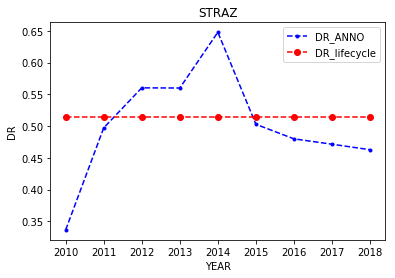

In [4]:
plt.plot(years, BS_impr['DR_ANNO'], color='b', linestyle = '--', marker = '.', label = 'DR_anno')

plt.title('STRAZ')
plt.xlabel('YEAR')
plt.ylabel('DR')
plt.plot(years, BS_impr['DR_lifecycle'], color='r', linestyle = '--', marker = 'o', label = 'DR_lifecycle')

# error-prone
plt.legend(['DR_ANNO', 'DR_lifecycle'])

# showing the plot in the matplotlib window
plt.show()

Hex colour palettes: #44[red]44[green]44[blue]

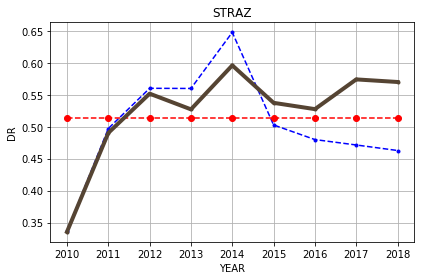

In [5]:
plt.title('STRAZ')
plt.xlabel('YEAR')
plt.ylabel('DR')

plt.plot(years, BS_impr['DR_ANNO'],
         color='b',
         linestyle = '--',
         marker = '.',
         label = 'DR_anno')

plt.plot(years,
         BS_impr['DR_lifecycle'],
         color='r',
         linestyle = '--',
         marker = 'o',
         label = 'DR_lifecycle')

plt.plot(years, BS_impr['DR_riproporzionato'],
         color = '#554433',
         marker = '.',
         label = 'DR_riproporzionato',
         linewidth = 4)

# giving padding
plt.tight_layout()

#appllying a grid
plt.grid(True)

# showing the plot in the matplotlib window
plt.show()

In [6]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


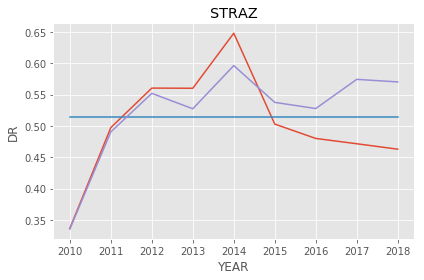

In [7]:
plt.style.use('ggplot')
plt.title('STRAZ')
plt.xlabel('YEAR')
plt.ylabel('DR')

plt.plot(years, BS_impr['DR_ANNO'])

plt.plot(years,
         BS_impr['DR_lifecycle'])

plt.plot(years, BS_impr['DR_riproporzionato'])

# giving padding
plt.tight_layout()

# showing the plot in the matplotlib window
plt.show()

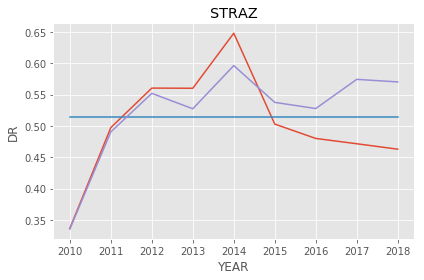

In [8]:

plt.title('STRAZ')
plt.xlabel('YEAR')
plt.ylabel('DR')

plt.plot(years, BS_impr['DR_ANNO'])

plt.plot(years,
         BS_impr['DR_lifecycle'])

plt.plot(years, BS_impr['DR_riproporzionato'])

# giving padding
plt.tight_layout()

# showing the plot in the matplotlib window
plt.show()

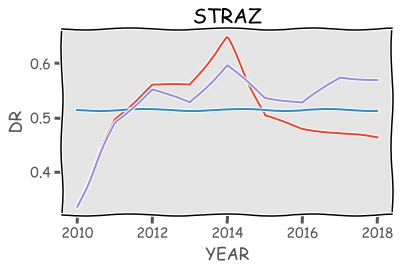

In [9]:
plt.xkcd()
plt.title('STRAZ')
plt.xlabel('YEAR')
plt.ylabel('DR')

plt.plot(years, BS_impr['DR_ANNO'])

plt.plot(years,
         BS_impr['DR_lifecycle'])

plt.plot(years, BS_impr['DR_riproporzionato'])

# giving padding
plt.tight_layout()

#saving the file as a PNG
plt.savefig('plot1.png')

# showing the plot in the matplotlib window
plt.show()

BAR PLOTS

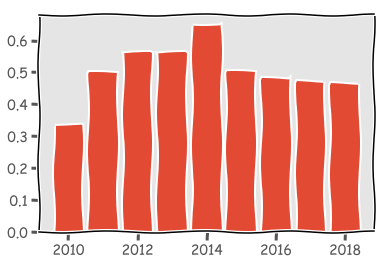

In [10]:
plt.bar(years, BS_impr['DR_ANNO'])
plt.show()

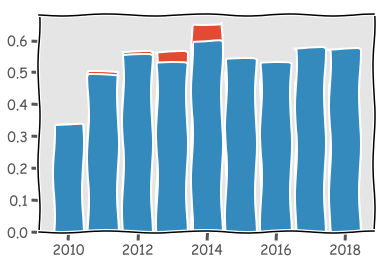

In [11]:
plt.bar(years, BS_impr['DR_ANNO'])
plt.bar(years, BS_impr['DR_riproporzionato'])
plt.style.use('ggplot')
plt.show()

In [12]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

"unstacking" the bar chart

In [13]:
import numpy as np

In [14]:
x_indeces = np.arange(len(years))

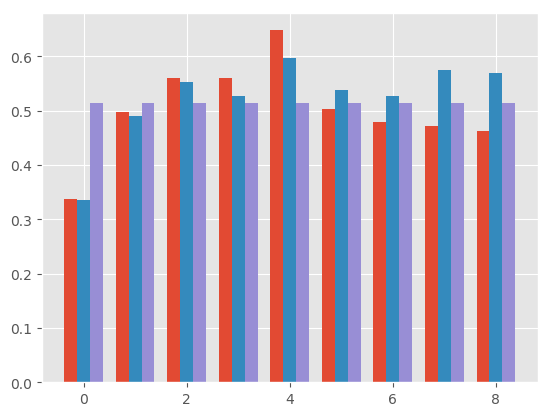

In [15]:
plt.rcdefaults()
plt.style.use('ggplot')
width = 0.25
plt.bar(x_indeces - width, BS_impr['DR_ANNO'],
       width = width)
plt.bar(x_indeces, BS_impr['DR_riproporzionato'],
       width = width)
plt.bar(x_indeces + width, BS_impr['DR_lifecycle'],
       width = width)

plt.show()

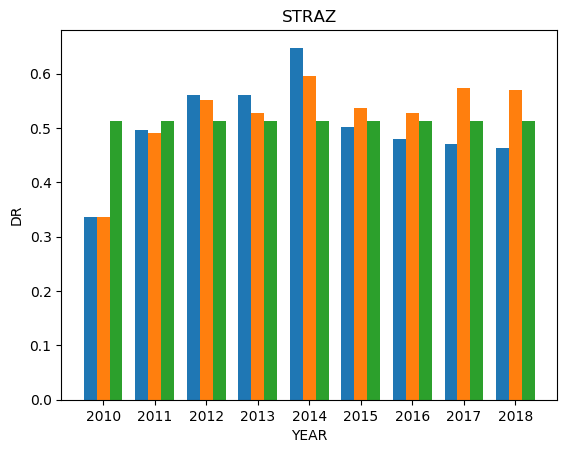

In [16]:
plt.rcdefaults()

plt.title('STRAZ')
plt.xlabel('YEAR')
plt.ylabel('DR')

plt.style.use('ggplot')
width = 0.25
plt.bar(x_indeces - width, BS_impr['DR_ANNO'],
       width = width)
plt.bar(x_indeces, BS_impr['DR_riproporzionato'],
       width = width)
plt.bar(x_indeces + width, BS_impr['DR_lifecycle'],
       width = width)

# labels the x-axis correctly
plt.xticks(ticks = x_indeces, labels = years)
plt.show()

digression on counters

In [17]:
from collections import Counter

c = Counter()
c.update(list(credit_index_data['year_ci']))
c


Counter({2010: 19,
         2011: 19,
         2012: 19,
         2013: 19,
         2014: 19,
         2015: 19,
         2016: 19,
         2017: 19,
         2018: 19})

In [18]:
c.most_common(2)

[(2010, 19), (2011, 19)]

Importing migration table

In [39]:
migrations = read_xlrange('C:/Users/ludann/Documents/BANCA_SELLA/Modello_LGD/PY_LAB/report_DR_agg2018_v2.xlsx',
            sheet_name = 'tabella_migrazioni_inst_bs',
             range_string = "B2:G30")

In [41]:
migrations

ED_C_COD_ABI bucket_ft EVENTO1 EVENTO2  migrazioni  prob_migr
0         03268      impr   PERFO   PASTD        8519   0.616336
1         03268      impr   PERFO   UTPNO        5221   0.377731
2         03268      impr   PERFO   UTPDI          74   0.005354
3         03268      impr   PERFO   SOFFE           8   0.000579
4         03268      impr   PASTD   PERFO        3377   0.401021
5         03268      impr   PASTD   UTPNO        2496   0.296402
6         03268      impr   PASTD   UTPDI        2542   0.301864
7         03268      impr   PASTD   SOFFE           6   0.000713
8         03268      impr   UTPNO   PERFO        2777   0.402522
9         03268      impr   UTPNO   UTPDI        4089   0.592695
10        03268      impr   UTPNO   SOFFE          33   0.004783
11        03268      impr   UTPDI   PERFO         167   0.026069
12        03268      impr   UTPDI   SOFFE        6239   0.973931
13        03268      impr   SOFFE   SOFFE        6288   1.000000
14        03268      priv   PERFO   PASTD       17260   0.779057
15        03268      priv   PERFO   UTPNO        4712   0.212683
16        03268      priv   PERFO   UTPDI         164   0.007402
17        03268      priv   PERFO   SOFFE          19   0.000858
18        03268      priv   PASTD   PERFO        9465   0.558638
19        03268      priv   PASTD   UTPNO        2646   0.156171
20        03268      priv   PASTD   UTPDI        4743   0.279939
21        03268      priv   PASTD   SOFFE          89   0.005253
22        03268      priv   UTPNO   PERFO        3820   0.605964
23        03268      priv   UTPNO   UTPDI        2242   0.355647
24        03268      priv   UTPNO   SOFFE         242   0.038388
25        03268      priv   UTPDI   PERFO         320   0.046935
26        03268      priv   UTPDI   SOFFE        6498   0.953065
27        03268      priv   SOFFE   SOFFE        6848   1.000000

filtering the data

plotting

### Pie charts

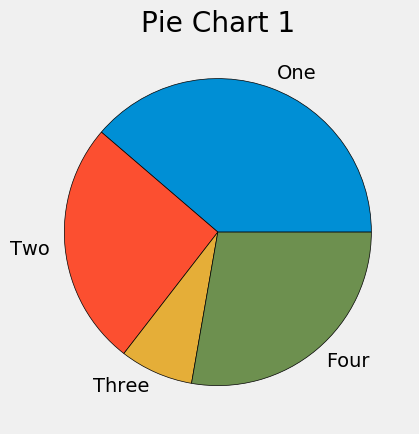

In [24]:
plt.style.use('fivethirtyeight')
plt.title('Pie Chart 1')
plt.tight_layout()

#dummy data
slices = [60, 40, 12, 43]
labels = ['One', 'Two', 'Three', 'Four']
colours = ['blue', 'red', 'yellow', 'green']
# but, actually, use hex colours
plt.pie(slices,
        labels = labels,
        wedgeprops={'edgecolor':'black'})
plt.show()
# plt.pie calculates proportions according to the numbers provided

In [42]:
migrations

ED_C_COD_ABI bucket_ft EVENTO1 EVENTO2  migrazioni  prob_migr
0         03268      impr   PERFO   PASTD        8519   0.616336
1         03268      impr   PERFO   UTPNO        5221   0.377731
2         03268      impr   PERFO   UTPDI          74   0.005354
3         03268      impr   PERFO   SOFFE           8   0.000579
4         03268      impr   PASTD   PERFO        3377   0.401021
5         03268      impr   PASTD   UTPNO        2496   0.296402
6         03268      impr   PASTD   UTPDI        2542   0.301864
7         03268      impr   PASTD   SOFFE           6   0.000713
8         03268      impr   UTPNO   PERFO        2777   0.402522
9         03268      impr   UTPNO   UTPDI        4089   0.592695
10        03268      impr   UTPNO   SOFFE          33   0.004783
11        03268      impr   UTPDI   PERFO         167   0.026069
12        03268      impr   UTPDI   SOFFE        6239   0.973931
13        03268      impr   SOFFE   SOFFE        6288   1.000000
14        03268      priv   PERFO   PASTD       17260   0.779057
15        03268      priv   PERFO   UTPNO        4712   0.212683
16        03268      priv   PERFO   UTPDI         164   0.007402
17        03268      priv   PERFO   SOFFE          19   0.000858
18        03268      priv   PASTD   PERFO        9465   0.558638
19        03268      priv   PASTD   UTPNO        2646   0.156171
20        03268      priv   PASTD   UTPDI        4743   0.279939
21        03268      priv   PASTD   SOFFE          89   0.005253
22        03268      priv   UTPNO   PERFO        3820   0.605964
23        03268      priv   UTPNO   UTPDI        2242   0.355647
24        03268      priv   UTPNO   SOFFE         242   0.038388
25        03268      priv   UTPDI   PERFO         320   0.046935
26        03268      priv   UTPDI   SOFFE        6498   0.953065
27        03268      priv   SOFFE   SOFFE        6848   1.000000

In [ ]:
migrations_perfo_impr = migrations.where((migrations['EVENTO1'] == 'PERFO') & (migrations['bucket_ft'] == 'impr')).

migrations_perfo_impr

In [ ]:
plt.title('ciao')
plt.pie(migrations_perfo_impr['migrazioni'],
       labels = migrations_perfo_impr['EVENTO2'],
       shadow = True,
       wedgeprops = {'edgecolor' : 'blue'},
       )
plt.show()